In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet

In [2]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
pd.options.display.max_columns = None
housing.sample(5)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
270,527226020,1474,115000,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NoSewr,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal
596,533252130,1437,218000,20,RL,90.0,10768,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,1Story,5,8,1976,2004,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Gd,ALQ,1157.0,Unf,0.0,280.0,1437.0,GasA,TA,Y,SBrkr,1437,0,0,1.0,0.0,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,1976.0,RFn,2.0,528.0,TA,TA,Y,0,21,0,0,180,0,NaN,NaN,NaN,0,7,2007,WD,Normal
242,923228200,992,106500,180,RM,NaN,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SLvl,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,503.0,Unf,0.0,27.0,530.0,GasA,TA,Y,SBrkr,530,462,0,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,BuiltIn,1970.0,Fin,1.0,297.0,TA,TA,Y,112,97,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
416,903230110,1216,115000,50,RM,60.0,5520,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,5,7,1920,1997,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Gd,BrkTil,TA,TA,No,ALQ,68.0,Unf,0.0,497.0,565.0,GasA,TA,Y,SBrkr,565,651,0,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,BuiltIn,1920.0,RFn,1.0,355.0,Fa,TA,Y,0,0,180,0,0,0,NaN,MnPrv,NaN,0,4,2008,WD,Normal
168,905402070,1383,122000,20,RL,NaN,15635,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1383,0,0,0.0,0.0,1,0,2,1,TA,6,Mod,0,NaN,Attchd,1980.0,Unf,2.0,498.0,Fa,TA,Y,0,0,90,0,110,0,NaN,NaN,NaN,0,10,2009,WD,Normal


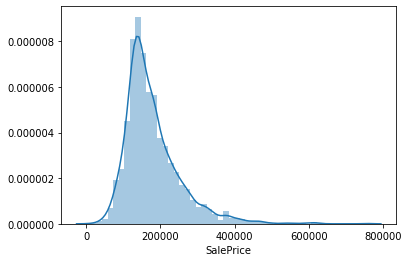

In [3]:
#check saleprice(target value)
sns.distplot(housing['SalePrice'])

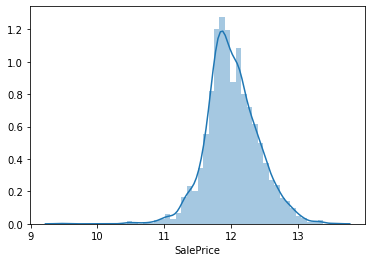

In [4]:

sns.distplot(np.log(housing['SalePrice']));

In [5]:
all_na = (housing.isnull().sum() / len(housing)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.651163
MiscFeature,96.240310
Alley,93.488372
Fence,79.651163
FireplaceQu,48.100775
LotFrontage,17.906977
GarageYrBlt,5.000000
GarageCond,5.000000
GarageQual,5.000000
GarageFinish,5.000000


Text(0.5, 1.0, 'Percent missing data by feature')

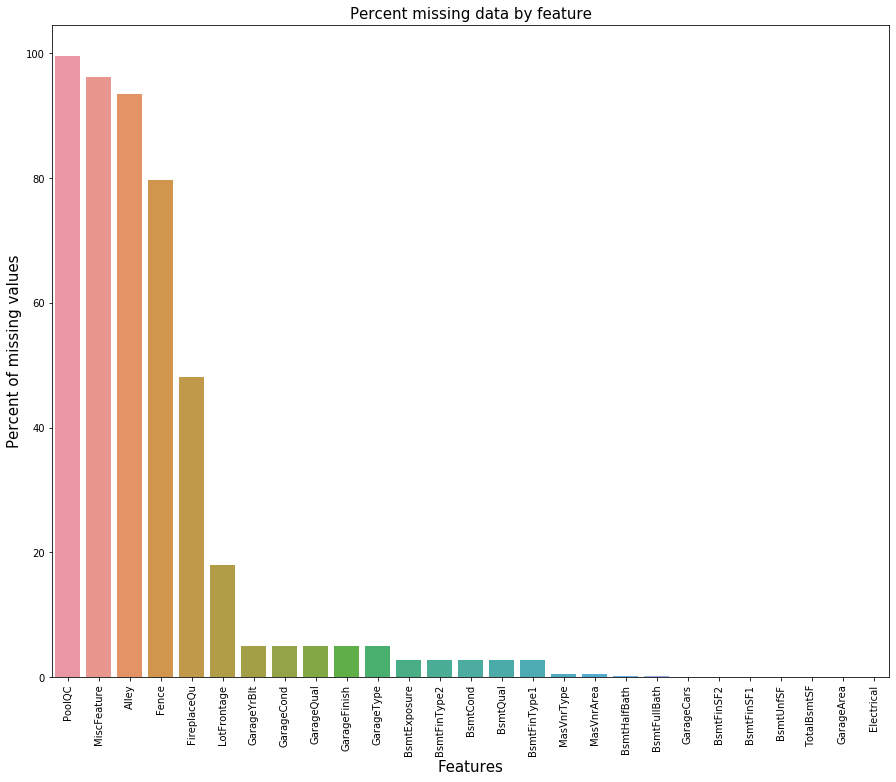

In [6]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Features cleaning

### PoolQC

In [7]:
housing["PoolQC"].value_counts()

TA    3
Gd    2
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [8]:
housing["PoolQC"] = housing["PoolQC"].fillna("None")
housing["PoolQC"].value_counts()

None    2571
TA         3
Gd         2
Ex         2
Fa         2
Name: PoolQC, dtype: int64

### MiscFeature

In [9]:
housing["MiscFeature"].value_counts()

Shed    88
Gar2     5
Othr     3
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
housing["MiscFeature"] = housing["MiscFeature"].fillna("None")
housing["MiscFeature"].value_counts()

None    2483
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

### Alley

In [11]:
housing["Alley"].value_counts()

Grvl    105
Pave     63
Name: Alley, dtype: int64

In [12]:
housing["Alley"] = housing["Alley"].fillna("None")
housing["Alley"].value_counts()

None    2412
Grvl     105
Pave      63
Name: Alley, dtype: int64

### Fence

In [13]:
housing["Fence"].value_counts()

MnPrv    301
GdPrv    111
GdWo     103
MnWw      10
Name: Fence, dtype: int64

In [14]:
housing["Fence"] = housing["Fence"].fillna("None")
housing["Fence"].value_counts()

None     2055
MnPrv     301
GdPrv     111
GdWo      103
MnWw       10
Name: Fence, dtype: int64

### FireplaceQu

In [15]:
housing["FireplaceQu"].value_counts()

Gd    619
TA    572
Fa     70
Po     43
Ex     35
Name: FireplaceQu, dtype: int64

In [16]:
housing["FireplaceQu"] = housing["FireplaceQu"].fillna("None")
housing["FireplaceQu"].value_counts()

None    1241
Gd       619
TA       572
Fa        70
Po        43
Ex        35
Name: FireplaceQu, dtype: int64

### LotFrontage

In [17]:
#LotFrontage: Linear feet of street connected to property
#fill with medium of neighborhood's LotFrontage
housing["LotFrontage"].describe()

count    2118.000000
mean       68.516053
std        22.835831
min        21.000000
25%        57.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
housing["LotFrontage"].fillna(housing.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)
housing[["Neighborhood","LotFrontage"]].head(30)

housing['LotFrontage'] =housing['LotFrontage'].fillna(value= housing.LotFrontage.median())


### GarageYrBlt, GarageType, GarageCars, GarageArea, GarageQual, GarageCond, GarageFinish

In [19]:
housing[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head() 

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
1,1939.0,Detchd,2.0,399.0,TA,TA,Unf
2,1984.0,Attchd,1.0,266.0,TA,TA,Fin
3,1930.0,Detchd,1.0,216.0,TA,Po,Unf
4,1940.0,Detchd,1.0,281.0,TA,TA,Unf
5,2001.0,Attchd,2.0,528.0,TA,TA,Fin


In [20]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('nan')
housing['GarageType'] = housing['GarageType'].fillna("None")
housing['GarageQual'] = housing['GarageQual'].fillna("None")
housing['GarageCond'] = housing['GarageCond'].fillna("None")
housing['GarageFinish'] = housing['GarageFinish'].fillna("None")
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)

In [21]:
housing[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head()

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
1,1939,Detchd,2.0,399.0,TA,TA,Unf
2,1984,Attchd,1.0,266.0,TA,TA,Fin
3,1930,Detchd,1.0,216.0,TA,Po,Unf
4,1940,Detchd,1.0,281.0,TA,TA,Unf
5,2001,Attchd,2.0,528.0,TA,TA,Fin


### BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, BsmtFullBath, BsmtHalfBath,TotalBsmtSF, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF

In [22]:
#check null values

housing[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head(20) 

#if one col is null, all of these columns are null

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
1,Unf,No,Rec,TA,TA,1.0,0.0,856.0,238.0,0.0,618.0
2,ALQ,Mn,GLQ,TA,Gd,1.0,0.0,1049.0,552.0,393.0,104.0
3,Unf,No,ALQ,TA,TA,0.0,0.0,837.0,737.0,0.0,100.0
4,Unf,No,Unf,TA,Fa,0.0,0.0,405.0,0.0,0.0,405.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,810.0,643.0,0.0,167.0
6,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
7,Unf,No,Unf,TA,Fa,0.0,0.0,936.0,0.0,0.0,936.0
8,Unf,Gd,Unf,TA,Gd,0.0,0.0,1146.0,0.0,0.0,1146.0
9,Unf,No,ALQ,TA,TA,0.0,0.0,864.0,647.0,0.0,217.0
10,Unf,Gd,GLQ,TA,Gd,1.0,0.0,547.0,467.0,0.0,80.0


In [23]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna("None")
housing['BsmtExposure'] = housing['BsmtExposure'].fillna("None")
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna("None")
housing['BsmtCond'] = housing['BsmtCond'].fillna("None")
housing['BsmtQual'] = housing['BsmtQual'].fillna("None")
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].fillna(0)
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinSF2'] = housing['BsmtFinSF2'].fillna(0)
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0)

In [24]:
housing[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']].head(20) 

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
1,Unf,No,Rec,TA,TA,1.0,0.0,856.0
2,ALQ,Mn,GLQ,TA,Gd,1.0,0.0,1049.0
3,Unf,No,ALQ,TA,TA,0.0,0.0,837.0
4,Unf,No,Unf,TA,Fa,0.0,0.0,405.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,810.0
6,None,None,None,None,None,0.0,0.0,0.0
7,Unf,No,Unf,TA,Fa,0.0,0.0,936.0
8,Unf,Gd,Unf,TA,Gd,0.0,0.0,1146.0
9,Unf,No,ALQ,TA,TA,0.0,0.0,864.0
10,Unf,Gd,GLQ,TA,Gd,1.0,0.0,547.0


### MasVnrArea, MasVnrType

In [25]:
# 0 MasVnrArea means no Masonry veneer
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['MasVnrType'] = housing['MasVnrType'].fillna("None")

In [26]:
housing['MasVnrArea'].value_counts()

0.0      1568
120.0      13
216.0      11
108.0      10
176.0      10
         ... 
647.0       1
549.0       1
262.0       1
668.0       1
402.0       1
Name: MasVnrArea, Length: 416, dtype: int64

In [27]:
housing['MasVnrType'].value_counts() 

None       1573
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64

### Electrical

In [28]:
#only one null value of electrical
housing['Electrical'].value_counts() #SBrkr is most frequent value so we fill null as SBrkr

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [29]:
housing['Electrical'] = housing['Electrical'].fillna("SBrkr")

### MSZoning

In [30]:
housing['MSZoning'].value_counts()

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

In [31]:
#fill Nan with RL which is most frequent value
housing['MSZoning'] = housing['MSZoning'].fillna("RL")

In [32]:
housing['MSZoning'].value_counts()

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

### Utilities

In [33]:
housing['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [34]:
#fill Nan with Allpub which is most frequent value 
housing['Utilities'] = housing['Utilities'].fillna("AllPub")

In [35]:
housing['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

### Functional

In [36]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [37]:
#fill Nan with Typ which is most frequent value
housing['Functional'] = housing['Functional'].fillna("Typ")

In [38]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

### SaleType

In [39]:
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

In [40]:
housing['SaleType'] = housing['SaleType'].fillna("WD")
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

### KitchenQual

In [41]:
housing['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

In [42]:
housing['KitchenQual'] = housing['KitchenQual'].fillna("TA")

In [43]:
housing['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

### Exterior1st and Exterior2nd

In [44]:
housing['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
CBlock       2
AsphShn      2
ImStucc      1
PreCast      1
Name: Exterior1st, dtype: int64

In [45]:
housing['Exterior1st'] = housing['Exterior1st'].fillna("VinylSd")
housing['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
CBlock       2
AsphShn      2
ImStucc      1
PreCast      1
Name: Exterior1st, dtype: int64

In [46]:
housing['Exterior2nd'].value_counts()

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
Stone        4
AsphShn      4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64

In [47]:
housing['Exterior2nd'] = housing['Exterior2nd'].fillna("VinylSd")
housing['Exterior2nd'].value_counts()

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
Stone        4
AsphShn      4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64

### Check every features

In [48]:
#check null values 
all_na = (housing.isnull().sum() / len(housing)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio


### Utilities

In [49]:
housing["Utilities"].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [50]:
# Since Utilities feature have almost same value, so we better remove it
housing.drop('Utilities', axis=1, inplace=True)

### Correlation

In [51]:
corr = housing.corr(method='pearson').drop(['SalePrice']).sort_values('SalePrice', ascending=False)['SalePrice']
corr 

OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652494
1stFlrSF         0.642613
GarageCars       0.638424
GarageArea       0.634669
YearBuilt        0.544370
FullBath         0.534982
YearRemodAdd     0.514309
MasVnrArea       0.498432
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.461070
LotFrontage      0.353905
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.290755
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.168060
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022668
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033786
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID             -0.226276
Name: SalePrice, dtype: float64

In [52]:
# we better delete correlation range from -0.1 ~ 0.1 but will see after result from it
# housing.drop('3SsnPorch', axis=1, inplace=True)
# housing.drop('PoolArea', axis=1, inplace=True)
# housing.drop('BsmtFinSF2', axis=1, inplace=True)
# housing.drop('MoSold', axis=1, inplace=True)
# housing.drop('YrSold', axis=1, inplace=True)
# housing.drop('MiscVal', axis=1, inplace=True)
# housing.drop('BsmtHalfBath', axis=1, inplace=True)
# housing.drop('LowQualFinSF', axis=1, inplace=True)
# housing.drop('OverallCond', axis=1, inplace=True)
# housing.drop('MSSubClass', axis=1, inplace=True)

In [53]:
housing.shape #delete 10 cols

(2580, 80)

In [54]:
housing.columns


Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDriv

In [55]:
#Create
housing2 = housing.copy()
housing2['PriceSqft'] = housing.SalePrice/housing.GrLivArea

In [56]:
housing2.sample()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceSqft
454,907255030,1947,274000,60,RL,70.0,9720,Pave,None,IR1,Lvl,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,9,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,134.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,1194.0,Unf,0.0,163.0,1357.0,GasA,Ex,Y,SBrkr,1366,581,0,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2001,Fin,3.0,725.0,TA,TA,Y,168,116,0,0,0,0,None,None,None,0,1,2008,WD,Normal,140.729327


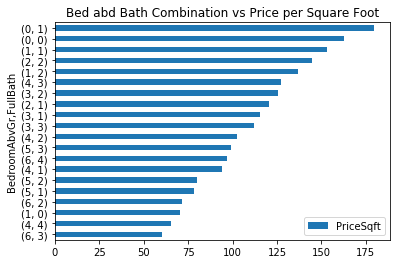

In [57]:
#housing2.loc[housing2.BedroomAbvGr >=1].\
housing2.groupby(['BedroomAbvGr', 'FullBath']).agg({'PriceSqft':'mean'}).\
sort_values(by='PriceSqft').plot(kind='barh', title='Bed abd Bath Combination vs Price per Square Foot')
plt.show()

In [58]:
housing2.groupby(['BedroomAbvGr', 'FullBath']).agg({'PriceSqft': 'mean'}).reset_index().\
pivot(index='BedroomAbvGr', columns='FullBath', values='PriceSqft')

FullBath,0,1,2,3,4
BedroomAbvGr,,,,,
0,162.77707,179.535468,NaN,NaN,NaN
1,70.52123,153.106504,136.896549,NaN,NaN
2,NaN,120.272286,144.778592,NaN,NaN
3,NaN,115.285663,125.639537,112.079867,NaN
4,NaN,94.089041,102.274788,127.343953,65.378289
5,NaN,78.058375,80.235592,99.304975,NaN
6,NaN,NaN,71.419028,60.377358,96.698959


In [59]:
housing2['bed_bath'] = housing['BedroomAbvGr'].apply(str).str.cat(housing['FullBath'].apply(str) , sep="-")
housing2

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceSqft,bed_bath
1,909176150,856,126000,30,RL,60.0,7890,Pave,None,Reg,Lvl,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,None,None,None,0,3,2010,WD,Normal,147.196262,2-1
2,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal,132.983794,2-2
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,None,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,Detchd,1930,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal,124.775225,2-1
4,535377150,1039,114000,70,RL,80.0,8146,Pave,None,Reg,Lvl,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1940,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal,109.720885,2-1
5,534177230,1665,227000,60,RL,70.0,8400,Pave,None,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,2001,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,None,None,None,0,11,2009,WD,Normal,136.336336,3-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,51.5,8854,Pave,None,Reg,Lvl,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,None,None,None,0,5,2009,WD,Normal,127.100840,2-1
760,905402060,1733,139600,20,RL,65.0,13680,Pave,None,IR1,Lvl,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Normal,80.553953,4-2
761,909275030,2002,145000,90,RH,82.0,6270,Pave,None,Reg,HLS,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,None,2Types,1949,Unf,3.0,871

In [60]:
housing2.bed_bath.value_counts()

3-2    752
3-1    642
2-1    395
4-2    263
2-2    261
1-1     87
4-1     66
5-2     25
4-3     19
6-2     16
3-3     15
5-3     10
1-2     10
0-0      6
5-1      5
6-4      3
1-0      2
0-1      1
4-4      1
6-3      1
Name: bed_bath, dtype: int64

In [61]:
use_columns = ['BedroomAbvGr', "FullBath"]

In [62]:
features = pd.get_dummies(housing[use_columns], drop_first=True, dummy_na=True)
target = np.log(housing['SalePrice'])


In [63]:
import statsmodels.api as sm
# X = sm.add_constant(features)
# # Notice that the dependent variable (y) comes before the independent variables (x)
# # Use df.columns.values to get all the column names
# model = sm.OLS(target, X)
# results = model.fit()
# print(results.summary())

In [64]:
housing['bb_diff']= np.abs(housing.BedroomAbvGr - housing.FullBath)


In [65]:
use_columns2 = ['BedroomAbvGr', "FullBath", 'bb_diff']


In [66]:
features2 = pd.get_dummies(housing[use_columns2], drop_first=True, dummy_na=True)
target2 = np.log(housing['SalePrice'])


In [67]:
# x = sm.add_constant(features2)
# # Notice that the dependent variable (y) comes before the independent variables (x)
# # Use df.columns.values to get all the column names
# model = sm.OLS(target2, x)
# results = model.fit()
# print(results.summary())

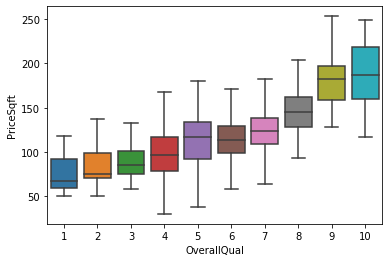

In [68]:
sns.boxplot(data=housing2, x='OverallQual', y='PriceSqft', showfliers=False)

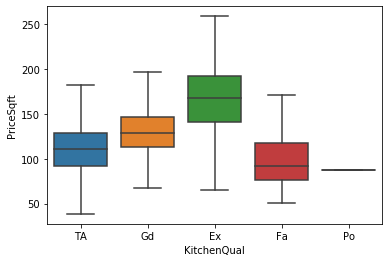

In [69]:
sns.boxplot(data=housing2, x='KitchenQual', y='PriceSqft', showfliers=False)

### Age of the House & Neighborhood VS Price Per Square Foot

In [70]:
# Creates column 'AgeWhenSold' which calculates the age of the house by the time it was sold
housing2['AgeWhenSold'] = housing2.YrSold - housing2.YearBuilt

In [71]:
# Creates dataframe with 'AgeWhenSold', 'Neighborhood' and 'PricePerSqft'
age_n = housing2[['AgeWhenSold', 'Neighborhood', 'PriceSqft']]

In [72]:
# Display the chart with the average of price per square foot per age
age_n.groupby(['AgeWhenSold']).agg({'PriceSqft' : 'mean'})

,PriceSqft
AgeWhenSold,
0,162.500014
1,155.876637
2,147.429409
3,149.332762
4,138.279557
...,...
127,74.804147
128,79.920873
129,82.864890


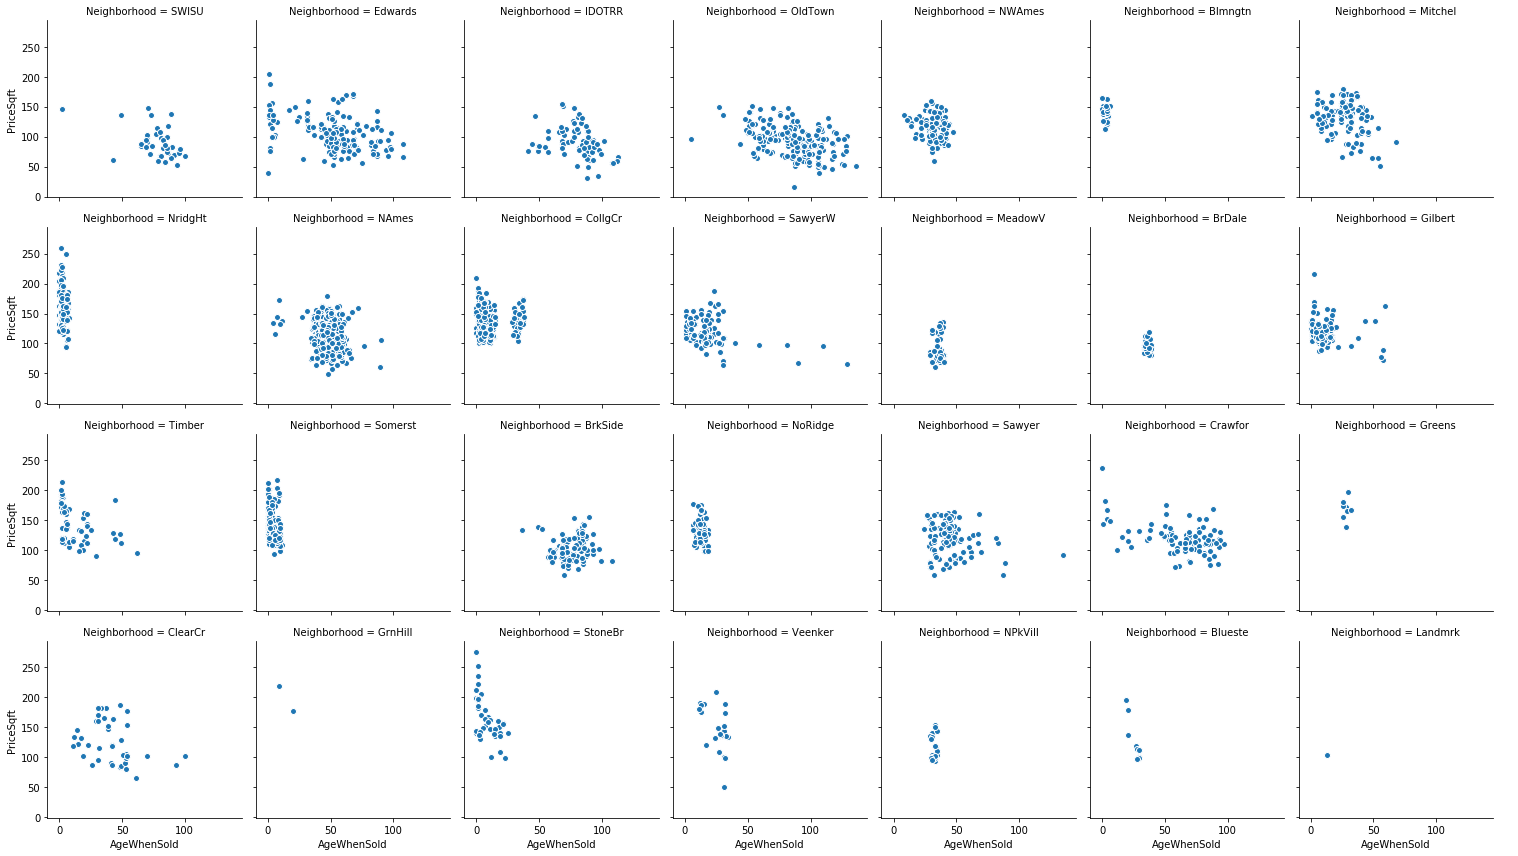

In [73]:
# Creates a grid for every neighborhoow to see the trend between "AgeWhenSold" and "PricePerSqFt"
age_n_plot = sns.FacetGrid(age_n, col="Neighborhood", col_wrap=7)
age_n_plot.map(plt.scatter, "AgeWhenSold", "PriceSqft", edgecolor="w").add_legend()
age_n_plot

- In the neighborhoods where its houses are built around the same year, they might have variation in prices due to different features of the house other than the age
- In the neighborhoods where its houses are built in different years, negative correlations are seen between the age and the price per square foot

### Trend of Price per Square Foot depending on its Built Year

In [74]:
# # Creates line plots depending on its difference in # of bathrooms and # of bedrooms
# diff_df = housing2.groupby(['bb_diff','YearBuilt']).PriceSqft.mean()
# diff_df = diff_df.unstack(level='bb_diff')
# diff_df.columns.name = 'PriceSqft'
# diff_df.dropna(subset=['lessEq1', 'more1']).plot(title = "Trend of Price Per Square Foot", figsize = (12,10))


#  Central AC and Fireplace

People favor having central AC than a fireplace.

In [75]:
housing2.Fireplaces.value_counts()

0    1241
1    1132
2     195
3      11
4       1
Name: Fireplaces, dtype: int64

In [76]:
housing2.CentralAir.value_counts()

Y    2417
N     163
Name: CentralAir, dtype: int64

In [77]:
ac_fire = housing2.loc[:, ['Fireplaces', 'CentralAir', 'PriceSqft']]
ac_fire['with_fireplace'] = ac_fire.Fireplaces.apply(lambda x : 'N'  if x==0 else 'Y')
ac_fire

,Fireplaces,CentralAir,PriceSqft,with_fireplace
1,1,Y,147.196262,Y
2,0,Y,132.983794,N
3,0,Y,124.775225,N
4,0,Y,109.720885,N
5,0,Y,136.336336,N
...,...,...,...,...
759,1,N,127.100840,Y
760,1,Y,80.553953,Y
761,0,N,72.427572,N
762,1,Y,118.078176,Y


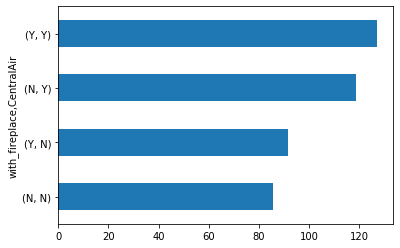

In [78]:
ac_fire.groupby(['with_fireplace', 'CentralAir'])['PriceSqft'].mean().sort_values()\
.plot(kind='barh')

# Predictive Modeling

In [174]:
housingFinal = housing.copy()

In [175]:
housingFinal.drop('PID', axis=1, inplace=True)

In [176]:
housingFinal.LotFrontage= housingFinal.LotFrontage.fillna(value= np.median(housingFinal.LotFrontage))

In [177]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
housingFinal['ExterQual'] = encoder.fit_transform(housingFinal[['ExterQual']])
housingFinal['ExterCond'] = encoder.fit_transform(housingFinal[['ExterCond']])
housingFinal['BsmtQual'] = encoder.fit_transform(housingFinal[['BsmtQual']])
housingFinal['BsmtCond'] = encoder.fit_transform(housingFinal[['BsmtCond']])
housingFinal['HeatingQC'] = encoder.fit_transform(housingFinal[['HeatingQC']])
housingFinal['FireplaceQu'] = encoder.fit_transform(housingFinal[['FireplaceQu']])
housingFinal['GarageQual'] = encoder.fit_transform(housingFinal[['GarageQual']])
housingFinal['GarageCond'] = encoder.fit_transform(housingFinal[['GarageCond']])
housingFinal['PoolQC'] = encoder.fit_transform(housingFinal[['PoolQC']])
housingFinal['KitchenQual'] = encoder.fit_transform(housingFinal[['KitchenQual']])

In [178]:
housingFinal.drop('bb_diff',axis=1, inplace=True)

In [179]:
housingFinal['ageWhenSold'] = housingFinal.YrSold - housingFinal.YearBuilt
housingFinal.drop(['YearBuilt', 'YrSold'], axis=1, inplace=True)

In [180]:
housingFinal

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,ageWhenSold
1,856,126000,30,RL,60.0,7890,Pave,None,Reg,Lvl,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3.0,4.0,CBlock,5.0,5.0,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,4.0,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,4.0,4,Typ,1,2.0,Detchd,1939,Unf,2.0,399.0,5.0,5.0,Y,0,0,0,0,166,0,3.0,None,None,0,3,WD,Normal,71
2,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,2.0,4.0,CBlock,2.0,5.0,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,4.0,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,2.0,5,Typ,0,3.0,Attchd,1984,Fin,1.0,266.0,5.0,5.0,Y,0,105,0,0,0,0,3.0,None,None,0,2,WD,Normal,25
3,1001,124900,30,C (all),60.0,6060,Pave,None,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,2.0,4.0,BrkTil,5.0,5.0,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,0.0,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,2.0,5,Typ,0,3.0,Detchd,1930,Unf,1.0,216.0,5.0,4.0,N,154,0,42,86,0,0,3.0,None,None,0,11,WD,Normal,77
4,1039,114000,70,RL,80.0,8146,Pave,None,Reg,Lvl,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,2.0,2.0,BrkTil,1.0,5.0,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,2.0,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,4.0,6,Typ,0,3.0,Detchd,1940,Unf,1.0,281.0,5.0,5.0,N,0,0,168,0,111,0,3.0,None,None,0,5,WD,Normal,109
5,1665,227000,60,RL,70.0,8400,Pave,None,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,4.0,PConc,2.0,5.0,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,0.0,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,2.0,6,Typ,0,3.0,Attchd,2001,Fin,2.0,528.0,5.0,5.0,Y,0,45,0,0,0,0,3.0,None,None,0,11,WD,Normal,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,121000,30,RL,51.5,8854,Pave,None,Reg,Lvl,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3.0,4.0,BrkTil,5.0,5.0,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,1.0,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,1.0,4,Typ,1,2.0,Detchd,1916,Unf,1.0,192.0,1.0,4.0,P,0,98,0,0,40,0,3.0,None,None,0,5,WD,Normal,93
760,1733,139600,20,RL,65.0,13680,Pave,None,IR1,Lvl,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,3.0,4.0,Slab,3.0,3.0,None,None,0.0,None,0.0,0.0,0.0,GasA,0.0,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,4.0,8,Min2,1,2.0,Attchd,1955,Unf,2.0,452.0,5.0,5.0,Y,0,0,0,0,0,0,3.0,None,None,0,6,WD,Normal,54
761,2002,145000,90,RH,82.0,6270,Pave,None,Reg,HLS,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3.0,4.0,CBlock,5.0,5.0,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,4.0,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,4.0,8,Typ,0,3.0,2Types,1949,Unf,3.0,871.0,5.0,5.0,Y,0,0,0,0,0,0,3.0,None,None,0,8,WD,Normal,58
762,1842,217500,60,RL,70.0,8826,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,2.0,4.0,PConc,2.0,5.0,No,GLQ,841.

In [181]:
catVar= housingFinal.loc[:, housingFinal.dtypes==object].copy()
catVar.drop('GarageYrBlt', axis=1, inplace=True)


In [182]:
target = np.log(housingFinal.SalePrice)
target

1      11.744037
2      11.845820
3      11.735269
4      11.643954
5      12.332705
         ...    
759    11.703546
760    11.846536
761    11.884489
762    12.289954
763    12.278393
Name: SalePrice, Length: 2580, dtype: float64

In [183]:
catVar = pd.get_dummies(catVar, drop_first=True, dummy_na=True)

In [184]:
numVar = housingFinal.loc[:, housingFinal.dtypes!=object].copy()
numVar.drop('SalePrice', axis= 1, inplace=True)

In [185]:
houseFeatures = pd.concat([catVar, numVar], axis=1)
houseFeatures.shape

(2580, 262)

In [93]:
GridSearchCV?

Object `GridSearchCV` not found.


In [186]:
#Split the data to 805 to 20%s
np.random.seed(4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(houseFeatures, target, test_size=0.2, random_state=42)

# Lasso and GridSearchCV

In [187]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
lasso.set_params(max_iter=3000 , normalize=True)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=3000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [188]:
grid_param = [{'alpha': np.linspace(1e-5, 1e-3,  100)}]
## fit all models
lasso_search = GridSearchCV(lasso, param_grid=grid_param, cv=10, return_train_score=True, n_jobs=-1)
lasso_search.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=3000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': array([1.0e-05, 2.0e-05, 3.0e-05, 4.0e-05, 5.0e-05, 6.0e-05, 7.0e-05,
       8.0e-05, 9.0e-05, 1.0e...
       6.4e-04, 6.5e-04, 6.6e-04, 6.7e-04, 6.8e-04, 6.9e-04, 7.0e-04,
       7.1e-04, 7.2e-04, 7.3e-04, 7.4e-04, 7.5e-04, 7.6e-04, 7.7e-04,
       7.8e-04, 7.9e-04, 8.0e-04, 8.1e-04, 8.2e-04, 8.3e-04, 8.4e-04,
       8.5e-04, 8.6e-04, 8.7e-04, 8.8e-04, 8.9e-04, 9.0e-04, 9.1e-04,
       9.2e-04, 9.3e-04, 9.4e-04, 9.5e-04, 9.6e-04, 9.7e-04, 9.8e-04,
       9.9e-04, 1.0e-03])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose

In [189]:
lasso_search.best_params_

{'alpha': 5.9999999999999995e-05}

In [190]:
# R2 for the best estimator using the trainng data sets
lasso_search.best_score_

0.9051163369299996

In [191]:
lasso_search.score(X_test, y_test)


0.9258590783748175

In [192]:
import pickle
lasso_model = pickle.dumps(lasso_search)
lasso_model2 = pickle.loads(lasso_model)



## Ridge + GridSearchCV

In [193]:
ridge= Ridge()
ridge.set_params(normalize=True, max_iter=2000)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=2000, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [194]:
grid_param = [{'alpha': np.linspace(.01, 1,  100)}]
## fit all models
ridge_search = GridSearchCV(ridge, param_grid=grid_param, cv=10, return_train_score=True, n_jobs=-1)
ridge_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=2000, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.2...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [195]:
ridge_search.best_params_

{'alpha': 0.13}

In [196]:
ridge_search.best_score_

0.9042606522316703

In [198]:
ridge_search.score(X_test, y_test)

0.9243069291168879

In [199]:
ridge_model = pickle.dumps(ridge_search)
ridge_model2 = pickle.loads(ridge_model)


# Elastic Net + GridSearchCV

In [ ]:
elasticnet = ElasticNet()

In [171]:
# grid_param = [{'alpha': np.linspace(5, 15,  100)}]
# ## fit all models
# net_search = GridSearchCV(elaticnet, param_grid=grid_param, cv=10, return_train_score=True, n_jobs=-1)
# net_search.fit(X_train, y_train)

NameError: name 'elaticnet' is not defined

## Ramdom Forest Regressor + GridSearchCV

In [200]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

In [ ]:
grid_para_forest = [{
    "n_estimators": [25, 50, 100],
    "criterion": ["mae", "mse"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

In [ ]:
grid_search_forest.best_params_

In [ ]:
grid_search_forest.best_score_

In [ ]:
grid_search_forest.score(X_test, y_test)

# Preparing data for descriptive modeling using R

In [ ]:
housingFinalR = housing.copy()


In [ ]:
housingFinalR.drop('PID', axis=1, inplace=True)

In [ ]:
housingFinalR['ageWhenSold'] = housingFinalR.YrSold - housingFinalR.YearBuilt

housingFinalR.drop('YearBuilt', axis= 1, inplace=True)

In [ ]:
housingFinalR['pricePerSqft'] = housingFinalR.SalePrice/housingFinalR.GrLivArea

In [ ]:
sns.scatterplot(y=housingFinalR.pricePerSqft, x=housingFinalR.ageWhenSold)

In [ ]:
housingFinalR.drop('bb_diff', axis=1, inplace=True)

In [ ]:
housingR = housingFinalR.copy()

In [ ]:
housingR['logSalePrice'] = np.log(housingFinalR.SalePrice)

In [ ]:
housingR.to_csv("housingR.csv")
